In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
# Creating multiple dataframe with different "look back" periods
# The periods are 1 day, 3 days. 7 days. 15 days. 30 days and 60 days
# The look back periods should be in the form of a list
# For example, if the look back period is 3, then the dataframe should have 3 columns
# Date, Close, [Close(t-1), Close(t-2), Close(t-3)]

def create_look_back_arrays(df, window_size = 1):
    df = df.drop(columns = ['Date'])
    df_as_np = df.to_numpy()
    X = []
    Y = []
    for i in range(len(df_as_np) - window_size):
        X.append(df_as_np[i:i+window_size])
        Y.append(df_as_np[i+window_size])
    return np.array(X), np.array(Y)

In [3]:
df = pd.read_csv('../Data/bitcoin_data.csv')

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
2809,2022-05-27,29251.140625,29346.943359,28326.613281,28627.574219,28627.574219,36582005748
2810,2022-05-28,28622.625000,28814.900391,28554.566406,28814.900391,28814.900391,35519577634
2811,2022-05-29,29019.867188,29498.009766,28841.107422,29445.957031,29445.957031,18093886409
2812,2022-05-30,29443.365234,31949.630859,29303.572266,31726.390625,31726.390625,39277993274


In [5]:
df = df[['Date', 'Close']]
scaler = MinMaxScaler()
df['Close'] = scaler.fit_transform(df[['Close']])

/var/folders/76/w363ly_90ln6pf3txlrc64bw0000gn/T/ipykernel_65323/263429702.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close'] = scaler.fit_transform(df[['Close']])


In [6]:
df

,Date,Close
0,2014-09-17,0.004144
1,2014-09-18,0.003655
2,2014-09-19,0.003216
3,2014-09-20,0.003425
4,2014-09-21,0.003275
...,...,...
2809,2022-05-27,0.422170
2810,2022-05-28,0.424949
2811,2022-05-29,0.434314
2812,2022-05-30,0.468154


In [7]:
lstm_1 = load_model('Models/lstm_1.h5')
lstm_3 = load_model('Models/lstm_3.h5')
lstm_7 = load_model('Models/lstm_7.h5')
lstm_15 = load_model('Models/lstm_15.h5')
lstm_30 = load_model('Models/lstm_30.h5')
lstm_60 = load_model('Models/lstm_60.h5')

gru_1 = load_model('Models/gru_1.h5')
gru_3 = load_model('Models/gru_3.h5')
gru_7 = load_model('Models/gru_7.h5')
gru_15 = load_model('Models/gru_15.h5')
gru_30 = load_model('Models/gru_30.h5')
gru_60 = load_model('Models/gru_60.h5')

In [8]:
# creating a look back window of 60 days 
X, y = create_look_back_arrays(df, 60)

In [9]:
X.shape, y.shape

((2754, 60, 1), (2754, 1))

In [10]:
lstm_1_predictions = []
lstm_3_predictions = []
lstm_7_predictions = []
lstm_15_predictions = []
lstm_30_predictions = []
lstm_60_predictions = []

gru_1_predictions = []
gru_3_predictions = []
gru_7_predictions = []
gru_15_predictions = []
gru_30_predictions = []
gru_60_predictions = []

In [11]:
X.shape

(2754, 60, 1)

In [12]:
X[0], y[0]

(array([[0.00414359],
        [0.00365546],
        [0.00321557],
        [0.00342492],
        [0.0032753 ],
        [0.00332473],
        [0.0038239 ],
        [0.00363714],
        [0.00346454],
        [0.00335845],
        [0.00328567],
        [0.00295417],
        [0.00292874],
        [0.00309905],
        [0.00304965],
        [0.00292288],
        [0.00269198],
        [0.00223721],
        [0.00211322],
        [0.00225521],
        [0.00234585],
        [0.00259445],
        [0.0027738 ],
        [0.0027224 ],
        [0.00273334],
        [0.00297447],
        [0.00315054],
        [0.0033057 ],
        [0.00321523],
        [0.00303393],
        [0.00305177],
        [0.0031658 ],
        [0.00313766],
        [0.00303822],
        [0.00309209],
        [0.00304287],
        [0.00267573],
        [0.00267466],
        [0.00251033],
        [0.00262063],
        [0.00259518],
        [0.00266387],
        [0.00233701],
        [0.00248116],
        [0.00237752],
        [0

In [13]:
X[0][-1].reshape(1, 1)

array([[0.00293862]])

In [14]:
lstm_1.predict(X[0][-1].reshape(1, 1, 1)), y[0]

1/1 [==============================] - 0s 151ms/step


(array([[0.00386051]], dtype=float32), array([0.00311297]))

In [15]:
scaler.inverse_transform(lstm_1.predict(X[0][-1].reshape(1, 1, 1)))

1/1 [==============================] - 0s 8ms/step


array([[438.25754]], dtype=float32)

In [16]:
scaler.inverse_transform(y[0].reshape(1, 1))

array([[387.88198853]])

In [17]:
X[0], X[0, -3:, -1].reshape(-1, 3, 1)

(array([[0.00414359],
        [0.00365546],
        [0.00321557],
        [0.00342492],
        [0.0032753 ],
        [0.00332473],
        [0.0038239 ],
        [0.00363714],
        [0.00346454],
        [0.00335845],
        [0.00328567],
        [0.00295417],
        [0.00292874],
        [0.00309905],
        [0.00304965],
        [0.00292288],
        [0.00269198],
        [0.00223721],
        [0.00211322],
        [0.00225521],
        [0.00234585],
        [0.00259445],
        [0.0027738 ],
        [0.0027224 ],
        [0.00273334],
        [0.00297447],
        [0.00315054],
        [0.0033057 ],
        [0.00321523],
        [0.00303393],
        [0.00305177],
        [0.0031658 ],
        [0.00313766],
        [0.00303822],
        [0.00309209],
        [0.00304287],
        [0.00267573],
        [0.00267466],
        [0.00251033],
        [0.00262063],
        [0.00259518],
        [0.00266387],
        [0.00233701],
        [0.00248116],
        [0.00237752],
        [0

In [18]:
# Creating the list of X for each model.
# Since all the models predict the next day's closing price and have differnet look back windows,
# we'll use the 60 day look back window and extract the look back window for each model
# For example, in the 60 day look back window, if we want to use the 3 day model, we'll use the last 3 days

# Extracting the different look back windows for each model
one_day_window = X[:, -1, -1].reshape(-1, 1, 1)
three_day_window = X[:, -3:, -1].reshape(-1, 3, 1)
seven_day_window = X[:, -7:, -1].reshape(-1, 7, 1)
fifteen_day_window = X[:, -15:, -1].reshape(-1, 15, 1)
thirty_day_window = X[:, -30:, -1].reshape(-1, 30, 1)
sixty_day_window = X[:, :, -1].reshape(-1, 60, 1)

In [19]:
# Predict the prices through the model now
lstm_1_predictions = scaler.inverse_transform(lstm_1.predict(one_day_window))
lstm_3_predictions = scaler.inverse_transform(lstm_3.predict(three_day_window))
lstm_7_predictions = scaler.inverse_transform(lstm_7.predict(seven_day_window))
lstm_15_predictions = scaler.inverse_transform(lstm_15.predict(fifteen_day_window))
lstm_30_predictions = scaler.inverse_transform(lstm_30.predict(thirty_day_window))
lstm_60_predictions = scaler.inverse_transform(lstm_60.predict(sixty_day_window))

gru_1_predictions = scaler.inverse_transform(gru_1.predict(one_day_window))
gru_3_predictions = scaler.inverse_transform(gru_3.predict(three_day_window))
gru_7_predictions = scaler.inverse_transform(gru_7.predict(seven_day_window))
gru_15_predictions = scaler.inverse_transform(gru_15.predict(fifteen_day_window))
gru_30_predictions = scaler.inverse_transform(gru_30.predict(thirty_day_window))
gru_60_predictions = scaler.inverse_transform(gru_60.predict(sixty_day_window))

87/87 [==============================] - 0s 2ms/step


In [20]:
lstm_1_predictions.shape, lstm_3_predictions.shape, lstm_7_predictions.shape, lstm_15_predictions.shape, lstm_30_predictions.shape, lstm_60_predictions.shape

((2754, 1), (2754, 1), (2754, 1), (2754, 1), (2754, 1), (2754, 1))

In [21]:
gru_1_predictions.shape, gru_3_predictions.shape, gru_7_predictions.shape, gru_15_predictions.shape, gru_30_predictions.shape, gru_60_predictions.shape

((2754, 1), (2754, 1), (2754, 1), (2754, 1), (2754, 1), (2754, 1))

In [22]:
y.shape

(2754, 1)

In [23]:
# Creating a dataframe with all the predictions and the actual values
predictions_df = pd.DataFrame({'Actual': scaler.inverse_transform(y.reshape(-1, 1)).reshape(-1), 
                               'LSTM_1': lstm_1_predictions.reshape(-1), 
                               'LSTM_3': lstm_3_predictions.reshape(-1),
                               'LSTM_7': lstm_7_predictions.reshape(-1),
                               'LSTM_15': lstm_15_predictions.reshape(-1),
                               'LSTM_30': lstm_30_predictions.reshape(-1),
                               'LSTM_60': lstm_60_predictions.reshape(-1),
                               'GRU_1': gru_1_predictions.reshape(-1),
                               'GRU_3': gru_3_predictions.reshape(-1),
                               'GRU_7': gru_7_predictions.reshape(-1),
                               'GRU_15': gru_15_predictions.reshape(-1),
                               'GRU_30': gru_30_predictions.reshape(-1),
                               'GRU_60': gru_60_predictions.reshape(-1)}, index = df['Date'][60:])

In [24]:
predictions_df

,Actual,LSTM_1,LSTM_3,LSTM_7,LSTM_15,LSTM_30,LSTM_60,GRU_1,GRU_3,GRU_7,GRU_15,GRU_30,GRU_60
Date,,,,,,,,,,,,,
2014-11-16,387.881989,438.257782,463.300049,468.583588,483.775177,376.525146,386.010925,393.818207,395.499664,472.643768,397.844879,463.392731,236.958420
2014-11-17,387.407990,449.921722,450.377655,471.401550,492.050537,377.593597,392.481537,405.584839,382.999298,471.508179,401.989960,474.422272,248.737457
2014-11-18,375.197998,449.454285,445.770264,473.255402,493.168427,378.403137,394.099762,405.110107,379.774506,471.031830,402.231110,473.914612,247.647049
2014-11-19,380.554993,437.329407,446.881866,473.089996,482.341980,370.233063,384.226776,392.878815,380.174194,462.985901,396.983856,461.695740,235.178772
2014-11-20,357.839996,442.649017,444.076477,467.116394,485.646576,371.497772,386.776855,398.246124,377.030975,463.840454,398.837036,466.720428,240.772751
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-27,28627.574219,23869.228516,26447.271484,29051.880859,29781.492188,29424.837891,29492.935547,22511.603516,26257.433594,29257.234375,29643.275391,29576.158203,29342.843750
2022-05-28,28814.900391,23510.755859,26210.107422,28966.708984,29062.671875,28817.962891,28786.363281,22246.046875,26034.621094,28814.744141,28992.828125,28933.117188,28672.753906
2022-05-29,29445.957031,23615.677734,25980.800781,28862.097656,29431.060547,28866.087891,29182.013672,22323.818359,25788.228516,28732.650391,29171.945312,29159.105469,28954.982422


# Machine Learning Models

In [25]:
scaler = MinMaxScaler()
predictions_df['Actual'] = scaler.fit_transform(predictions_df[['Actual']])
predictions_df['LSTM_1'] = scaler.fit_transform(predictions_df[['LSTM_1']])
predictions_df['LSTM_3'] = scaler.fit_transform(predictions_df[['LSTM_3']])
predictions_df['LSTM_7'] = scaler.fit_transform(predictions_df[['LSTM_7']])
predictions_df['LSTM_15'] = scaler.fit_transform(predictions_df[['LSTM_15']])
predictions_df['LSTM_30'] = scaler.fit_transform(predictions_df[['LSTM_30']])
predictions_df['LSTM_60'] = scaler.fit_transform(predictions_df[['LSTM_60']])
predictions_df['GRU_1'] = scaler.fit_transform(predictions_df[['GRU_1']])
predictions_df['GRU_3'] = scaler.fit_transform(predictions_df[['GRU_3']])
predictions_df['GRU_7'] = scaler.fit_transform(predictions_df[['GRU_7']])
predictions_df['GRU_15'] = scaler.fit_transform(predictions_df[['GRU_15']])
predictions_df['GRU_30'] = scaler.fit_transform(predictions_df[['GRU_30']])
predictions_df['GRU_60'] = scaler.fit_transform(predictions_df[['GRU_60']])

predictions_df = predictions_df[['Actual', 'LSTM_30', 'GRU_15', 'LSTM_60', 'GRU_60']]

In [26]:
predictions_df

,Actual,LSTM_30,GRU_15,LSTM_60,GRU_60
Date,,,,,
2014-11-16,0.003113,0.002922,0.001362,0.003192,0.003146
2014-11-17,0.003106,0.002938,0.001424,0.003295,0.003328
2014-11-18,0.002925,0.002950,0.001427,0.003321,0.003311
2014-11-19,0.003004,0.002828,0.001349,0.003164,0.003119
2014-11-20,0.002667,0.002847,0.001376,0.003204,0.003205
...,...,...,...,...,...
2022-05-27,0.422170,0.439123,0.437708,0.465903,0.452504
2022-05-28,0.424949,0.430010,0.428003,0.454671,0.442159
2022-05-29,0.434314,0.430732,0.430676,0.460960,0.446516


In [27]:
meta_training_X =  predictions_df.iloc[:int(len(predictions_df) * 0.9)].drop(columns = ['Actual'])
meta_training_y = predictions_df.iloc[:int(len(predictions_df) * 0.9)]['Actual']

meta_testing_X = predictions_df.iloc[int(len(predictions_df) * 0.9):].drop(columns = ['Actual'])
meta_testing_y = predictions_df.iloc[int(len(predictions_df) * 0.9):]['Actual']

In [28]:
meta_training_X.shape, meta_training_y.shape, meta_testing_X.shape, meta_testing_y.shape

((2478, 4), (2478,), (276, 4), (276,))

In [29]:
meta_training_X

,LSTM_30,GRU_15,LSTM_60,GRU_60
Date,,,,
2014-11-16,0.002922,0.001362,0.003192,0.003146
2014-11-17,0.002938,0.001424,0.003295,0.003328
2014-11-18,0.002950,0.001427,0.003321,0.003311
2014-11-19,0.002828,0.001349,0.003164,0.003119
2014-11-20,0.002847,0.001376,0.003204,0.003205
...,...,...,...,...
2021-08-24,0.739026,0.736580,0.770483,0.754639
2021-08-25,0.712105,0.708041,0.734932,0.725531
2021-08-26,0.725425,0.727414,0.772771,0.747575


In [30]:
# The entire row is the input for the meta model
# reshape the input to be 3D [length, 12, 1]
meta_training_X = meta_training_X.to_numpy().reshape(-1, 4)
meta_testing_X = meta_testing_X.to_numpy().reshape(-1, 4)

meta_training_X.shape, meta_testing_X.shape

((2478, 4), (276, 4))

In [31]:
meta_training_X[0]

array([0.00292209, 0.0013617 , 0.00319214, 0.00314612], dtype=float32)

In [32]:
meta_training_y = meta_training_y.to_numpy().reshape(-1, 1)
meta_testing_y = meta_testing_y.to_numpy().reshape(-1, 1)

meta_training_y.shape, meta_testing_y.shape

((2478, 1), (276, 1))

In [33]:
meta_training_y[0]

array([0.00311297])

In [34]:
meta_model_LR = LinearRegression()
meta_model_RFR = RandomForestRegressor()
meta_model_SVR = SVR()
meta_model_KNN = KNeighborsRegressor()

meta_model_LR.fit(meta_training_X, meta_training_y)
meta_model_RFR.fit(meta_training_X, meta_training_y)
meta_model_SVR.fit(meta_training_X, meta_training_y)
meta_model_KNN.fit(meta_training_X, meta_training_y)

test_results = pd.DataFrame()
test_results['Actual'] = meta_testing_y.reshape(-1)
test_results['Predicted_LR'] = meta_model_LR.predict(meta_testing_X)
test_results['Predicted_RFR'] = meta_model_RFR.predict(meta_testing_X)
test_results['Predicted_SVR'] = meta_model_SVR.predict(meta_testing_X)
test_results['Predicted_KNN'] = meta_model_KNN.predict(meta_testing_X)

/var/folders/76/w363ly_90ln6pf3txlrc64bw0000gn/T/ipykernel_65323/1615355309.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  meta_model_RFR.fit(meta_training_X, meta_training_y)
/opt/miniconda3/envs/eth/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
# unscale the data to get the actual values
test_results['Actual'] = scaler.inverse_transform(test_results[['Actual']])
test_results['Predicted_LR'] = scaler.inverse_transform(test_results[['Predicted_LR']])
test_results['Predicted_RFR'] = scaler.inverse_transform(test_results[['Predicted_RFR']])
test_results['Predicted_SVR'] = scaler.inverse_transform(test_results[['Predicted_SVR']])
test_results['Predicted_KNN'] = scaler.inverse_transform(test_results[['Predicted_KNN']])

In [36]:
test_results

,Actual,Predicted_LR,Predicted_RFR,Predicted_SVR,Predicted_KNN
0,46795.819428,46832.960938,47446.846449,45442.875396,48191.128403
1,45089.886948,46751.375000,47494.151992,45432.403730,48191.128403
2,45197.252777,45167.160156,45132.687452,43548.057266,45453.648953
3,46812.347067,44991.425781,45999.327178,43883.211879,45653.128775
4,47274.377565,46380.800781,46533.389199,45481.727131,46749.605114
...,...,...,...,...,...
271,27377.990726,28152.236328,29202.389566,31478.957361,29865.897940
272,27558.043250,27557.287109,28054.203079,30992.917541,28976.786781
273,28164.596729,27645.031250,28054.203079,31163.946752,28976.786781
274,30356.483858,28211.798828,29867.736142,31649.239183,29865.897940


In [37]:
print("Linear Regression: ", meta_model_LR.score(meta_testing_X, meta_testing_y))
print("Random Forest Regressor: ", meta_model_RFR.score(meta_testing_X, meta_testing_y))
print("Support Vector Regressor: ", meta_model_SVR.score(meta_testing_X, meta_testing_y))
print("K Nearest Neighbors: ", meta_model_KNN.score(meta_testing_X, meta_testing_y))

Linear Regression:  0.9692678344083505
Random Forest Regressor:  0.9559984550660311
Support Vector Regressor:  0.8861394508481206
K Nearest Neighbors:  0.9525841387910008


In [38]:
test_results.index = df[60:]['Date'][int(len(predictions_df) * 0.9):].to_list()

In [39]:
test_results

,Actual,Predicted_LR,Predicted_RFR,Predicted_SVR,Predicted_KNN
2021-08-29,46795.819428,46832.960938,47446.846449,45442.875396,48191.128403
2021-08-30,45089.886948,46751.375000,47494.151992,45432.403730,48191.128403
2021-08-31,45197.252777,45167.160156,45132.687452,43548.057266,45453.648953
2021-09-01,46812.347067,44991.425781,45999.327178,43883.211879,45653.128775
2021-09-02,47274.377565,46380.800781,46533.389199,45481.727131,46749.605114
...,...,...,...,...,...
2022-05-27,27377.990726,28152.236328,29202.389566,31478.957361,29865.897940
2022-05-28,27558.043250,27557.287109,28054.203079,30992.917541,28976.786781
2022-05-29,28164.596729,27645.031250,28054.203079,31163.946752,28976.786781
2022-05-30,30356.483858,28211.798828,29867.736142,31649.239183,29865.897940


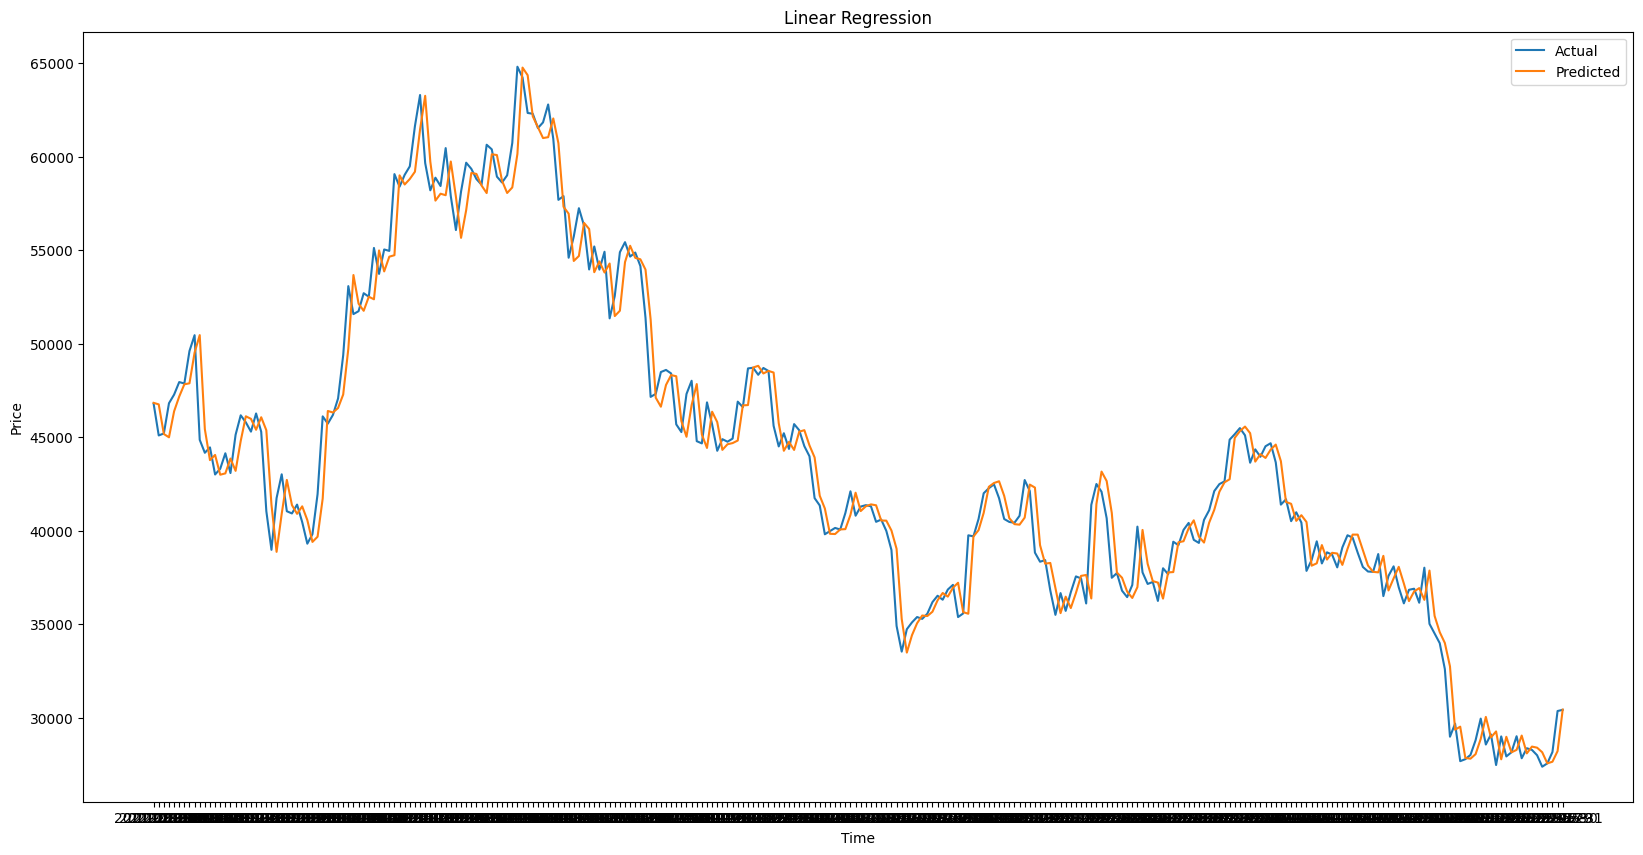

In [40]:
# Show 4 plots, one for each model and the actual values
# Then a final plot with all the models and the actual values

plt.figure(figsize = (20, 10))
plt.plot(test_results['Actual'], label = 'Actual')
plt.plot(test_results['Predicted_LR'], label = 'Predicted')
plt.title('Linear Regression')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

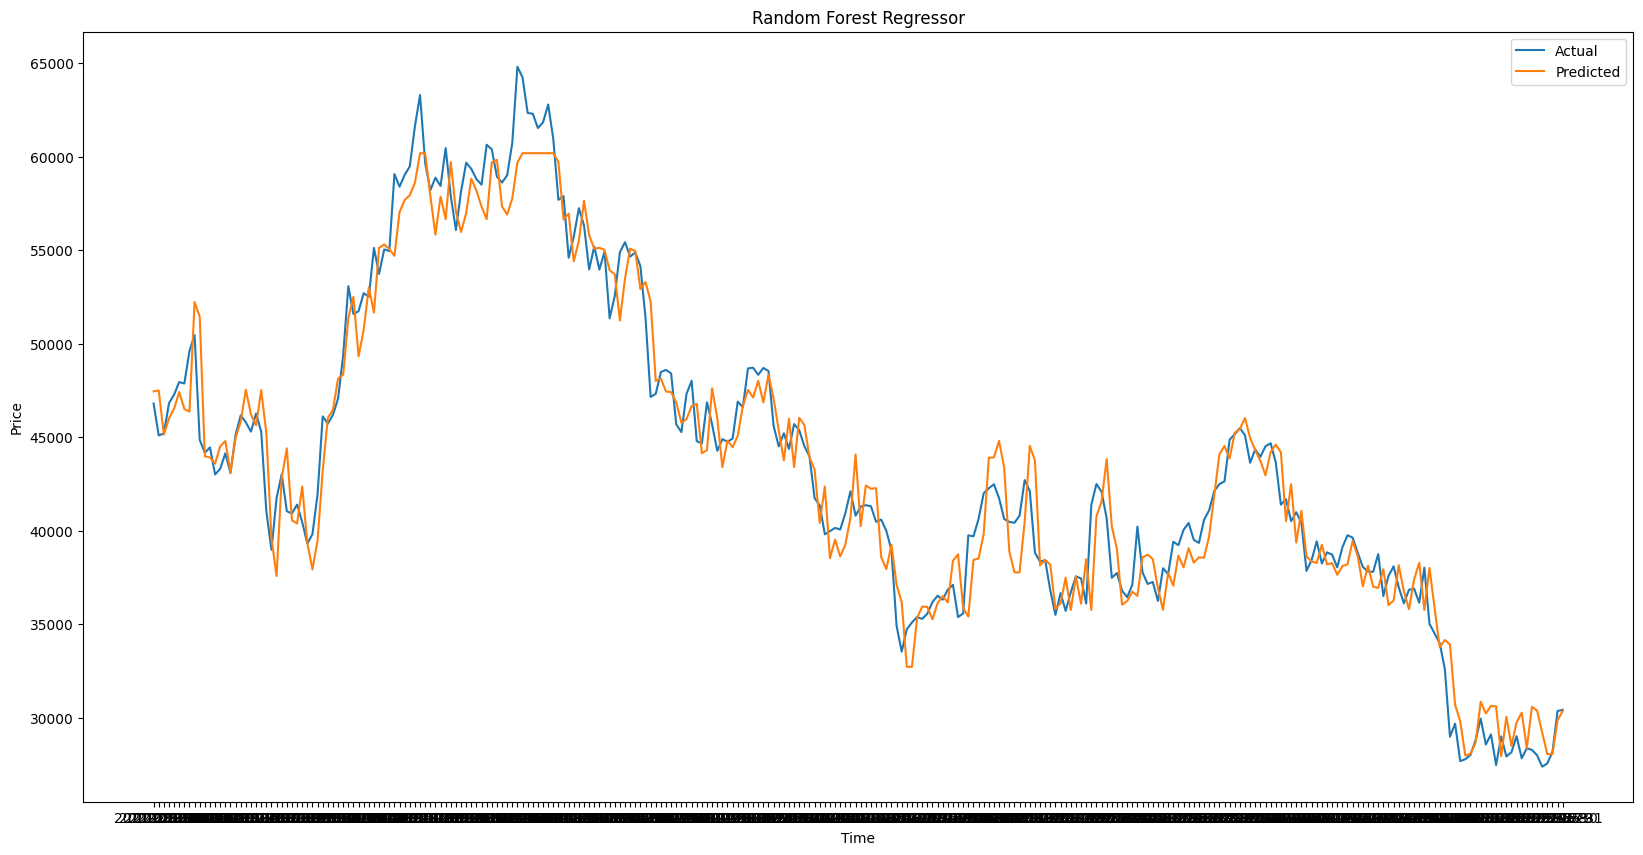

In [41]:
plt.figure(figsize = (20, 10))
plt.plot(test_results['Actual'], label = 'Actual')
plt.plot(test_results['Predicted_RFR'], label = 'Predicted')
plt.title('Random Forest Regressor')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

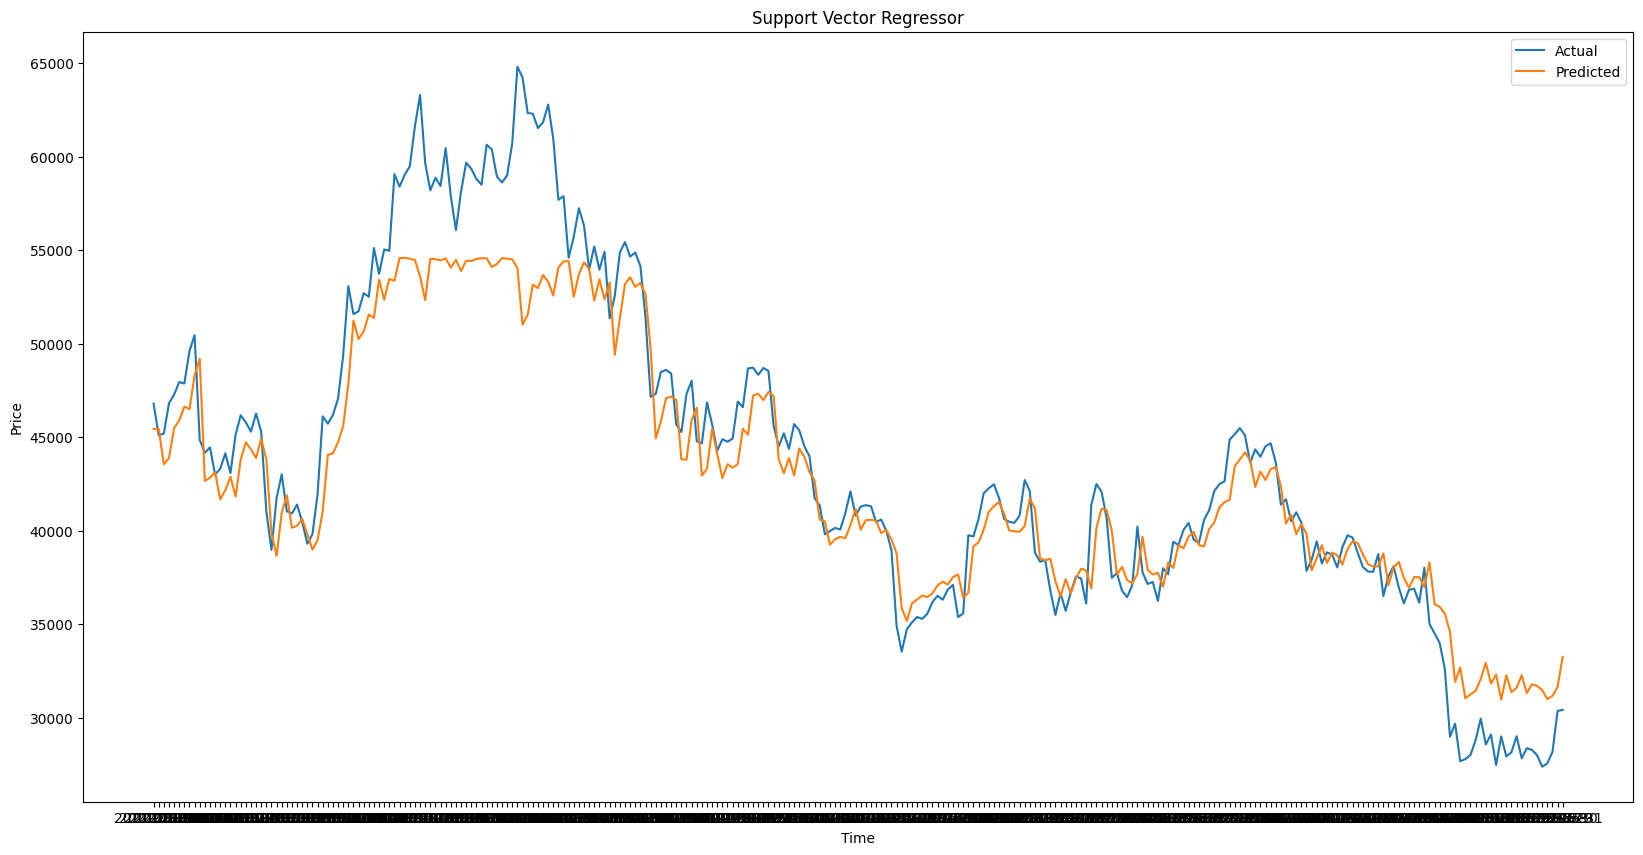

In [42]:
plt.figure(figsize = (20, 10))
plt.plot(test_results['Actual'], label = 'Actual')
plt.plot(test_results['Predicted_SVR'], label = 'Predicted')
plt.title('Support Vector Regressor')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

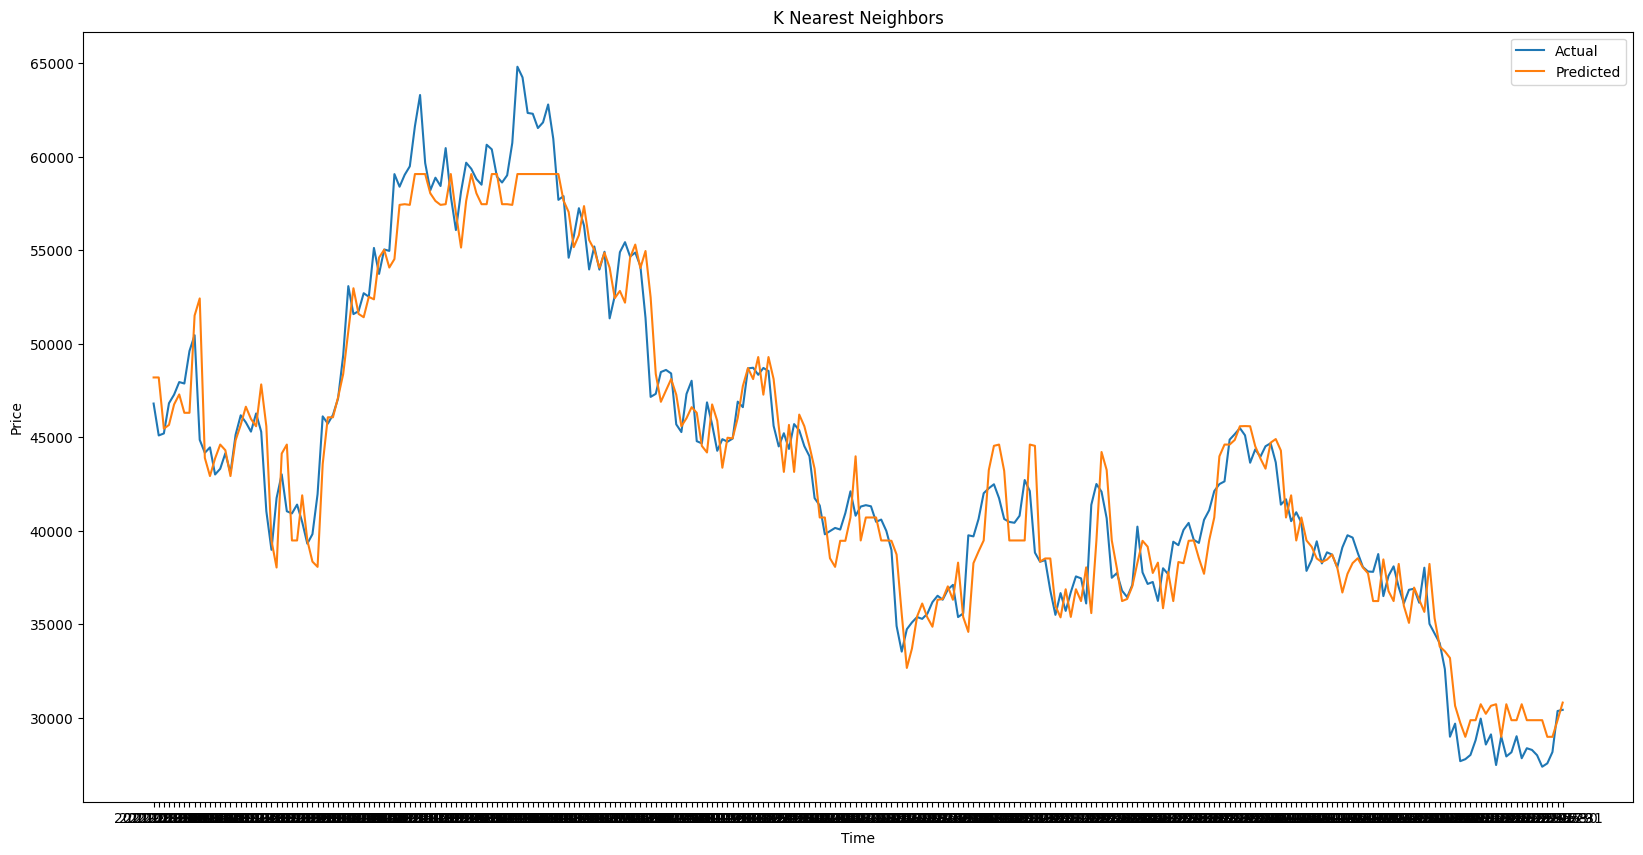

In [43]:
plt.figure(figsize = (20, 10))
plt.plot(test_results['Actual'], label = 'Actual')
plt.plot(test_results['Predicted_KNN'], label = 'Predicted')
plt.title('K Nearest Neighbors')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [44]:
# Calculating the root mean squared error and mean absolute error for each model

print("Linear Regression")
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(test_results['Actual'], test_results['Predicted_LR'])))
print("Mean Absolute Error: ", mean_absolute_error(test_results['Actual'], test_results['Predicted_LR']))

print("Random Forest Regressor")
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(test_results['Actual'], test_results['Predicted_RFR'])))
print("Mean Absolute Error: ", mean_absolute_error(test_results['Actual'], test_results['Predicted_RFR']))

print("Support Vector Regressor")
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(test_results['Actual'], test_results['Predicted_SVR'])))
print("Mean Absolute Error: ", mean_absolute_error(test_results['Actual'], test_results['Predicted_SVR']))

print("K Nearest Neighbors")
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(test_results['Actual'], test_results['Predicted_KNN'])))
print("Mean Absolute Error: ", mean_absolute_error(test_results['Actual'], test_results['Predicted_KNN']))

Linear Regression
Root Mean Squared Error:  1542.1247974604828
Mean Absolute Error:  1122.351765207864
Random Forest Regressor
Root Mean Squared Error:  1845.2571404272023
Mean Absolute Error:  1448.4807450787432
Support Vector Regressor
Root Mean Squared Error:  2968.312144769505
Mean Absolute Error:  2128.6431044834853
K Nearest Neighbors
Root Mean Squared Error:  1915.5114549228558
Mean Absolute Error:  1456.5404424864746
